In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
search_words = ['masennus oireet', 'masennustesti', 'masennus testi', 'synnytyksen jälkeinen masennus',
 'masennus hoito', 'ahdistus', 'keskivaikea masennus', 'psykoottinen masennus', 'lapsen masennus',
 'vakava masennus', 'depression', 'vaikea masennus', 'nuorten masennus', 'raskaus masennus',
 'väsymys', 'lievä masennus', 'masennuslääkkeet', 'mielenterveys', 'nuoren masennus',
 'masennus blogi', 'itsemurha', 'masennus keskustelu', 'psykoosi', 'masennuksen hoito',
 'masennus itsehoito', 'krooninen masennus','kaksisuuntainen mielialahäiriö',
 'masennus keskustelu', 'depression test', 'depression symptoms', 'manic depression',
 'postpartum depression', 'crippling depression', 'clinical depression', 'high functioning depression']



In [3]:
# Data_directory :
# directory = f'https://raw.githubusercontent.com/nafis-git/Googgle_trend_data_analysis/main/data/_{word}.csv'
directory = "C:\\Users\\nafis\\Documents\\master_thesis_dir\\thesis\\google_trend_data\\GT_update\\not_duplicate"

In [4]:
# check number of records and nan values
# to go through files of a directory we can use differnt methods
# use os.listdir to have list of files and subdirectories present in the given directory
# use os.scandir() to get an iterator of os.DirEntry objects corresponding to the entries in the directory given by specified path
# The glob.iglob() function returns an iterator over the list of pathnames that match the given pattern.




In [5]:
import os
import glob
import re
import pandas as pd
def stat_describe(directory):
    dict_df = {}
    for filename in glob.iglob(f'{directory}/*.csv'):
        recompile =  re.compile(r'.*\\_(.*)\.csv')
        word  = recompile.search(filename).groups()[0]
        df= pd.read_csv(filename).iloc[:,[1,2]]
        d_describe = df.describe()
        dict_df[word] = d_describe
    df_describe = pd.concat( [i for i in dict_df.values()],1).T
    return df_describe


In [6]:
df = stat_describe(directory)

C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\4167323606.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_describe = pd.concat( [i for i in dict_df.values()],1).T


### check the records and mean of search-interst for each term for all the 6 years

In [7]:
# plot number of recoords and mean of interst for each term
import numpy as np
import matplotlib.pyplot as plt
def plot_record_frequency(df):
    fig, ax = plt.subplots(1,1,figsize = (20,15))
    # sclae the number of records to be proportionate with value of mean of interst
    ax.barh(list(df.index),list(-i/1000 for i in df['count']), color='purple', edgecolor = 'maroon')
    # plot mean of interst
    ax.barh( list(df.index),list(df['mean']), color='green', edgecolor = 'maroon')
    plt.yticks(fontsize= 15, color = 'slategray')
    # to set tickle location in the x-axis , the distance between the maximum of mean of interst and maximum of scaled number of records divided in 20 tickles 
    tickle = [ int(i) for i in np.linspace(-(max(df['count'])/1000)-10,max(df['mean'])+10,20)]
    ax.set_xticks(tickle)
    # to set the ticklelable base on the real value of number of recoreds and mean of interst 
    ticklable = []
    for ticks in tickle :
        if ticks<0:
            ticklable.append(-ticks*1000)
        else:
            ticklable.append(ticks)
    ax.set_xticklabels(ticklable)
    ax.text(-10, -6, "Number Of Records", fontsize=20, horizontalalignment='right', color = 'purple', **{'weight':'bold'})
    ax.text(10, -6, "Mean Of Interest", fontsize=20, color = 'green', horizontalalignment='left', **{'weight':'bold'})
    plt.draw() # first to draw to be able to extract ytickels and change them to upper letters
    ytickle = [item.get_text().capitalize() for item in ax.get_yticklabels(which='both')]
    ax.set_yticklabels(ytickle)
    plt.grid()
    plt.xticks(fontsize= 15, rotation = 45, color = 'slategray')
    
    plt.show()

C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\2644869044.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytickle)


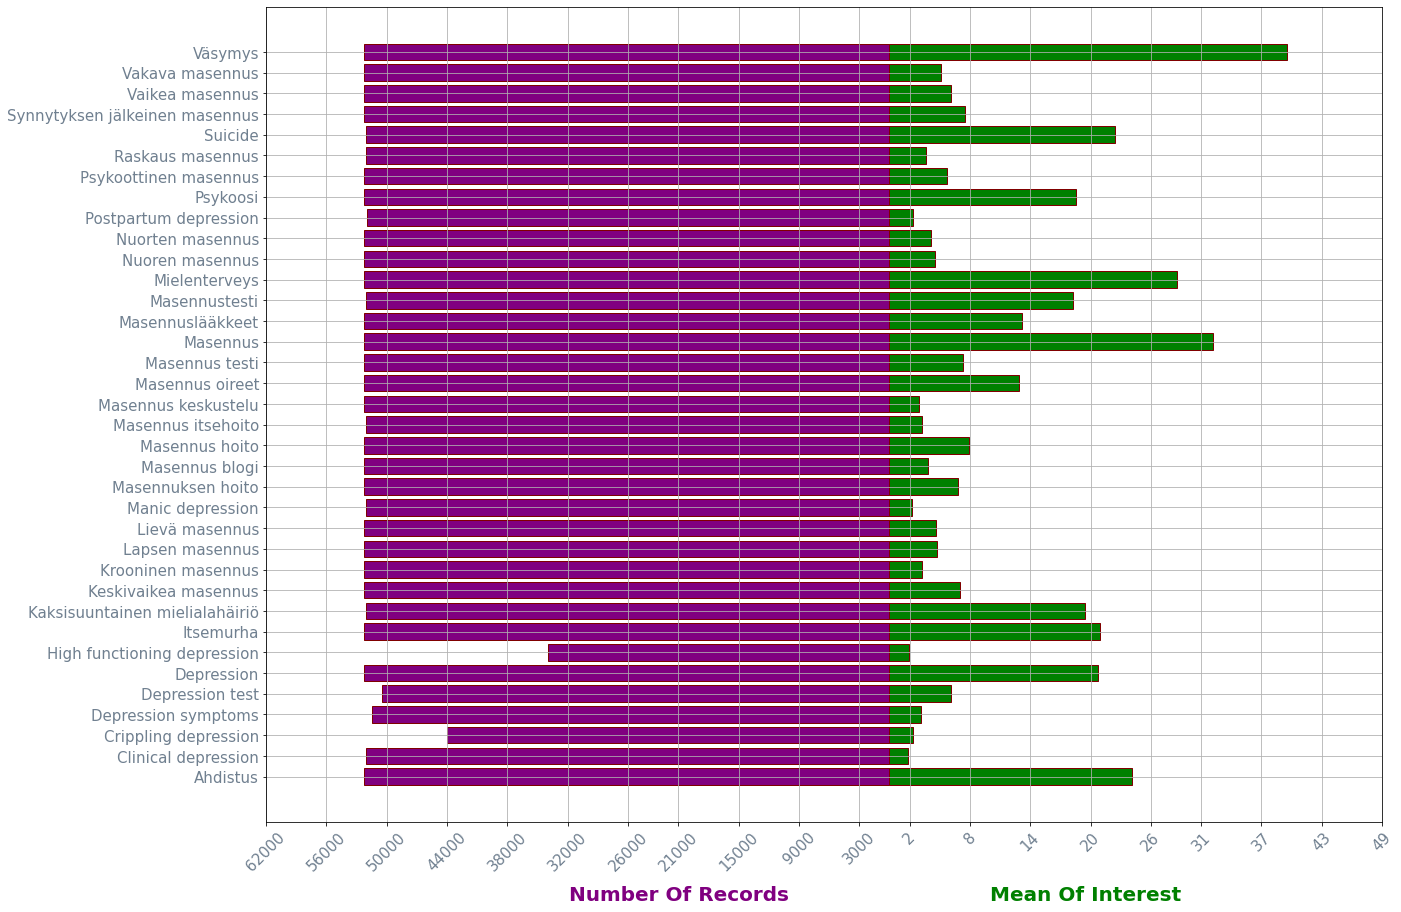

In [8]:
plot_record_frequency(df)

____________________________________

### check the records and mean of search-interst for each term for each of the 6 years

In [9]:
# also we can see number of records for each year to see if it is consistant during years

In [10]:
# read the data 
import os
import glob
import re
import pandas as pd
from datetime import datetime
def read_files(directory):
    dict_df = {}
    for filename in glob.iglob(f'{directory}/*.csv'):
        recompile =  re.compile(r'.*\\_(.*)\.csv')
        word  = recompile.search(filename).groups()[0]
        df= pd.read_csv(filename).iloc[:,[1,2]]
        # set the date as index to then have a correct concat
        df = df.set_index('date')
        dict_df[word] = df
        df_total = pd.concat( [i for i in dict_df.values()],1)
        # to change the index to a datetime object
        df_total ['date_time'] = [datetime.strptime(s, '%Y-%m-%d %H:%M:%S') for s in df_total.index]  # https://strftime.org/
        df_total['year'] = [d.year for d in df_total.date_time ]
        df_total['month'] = [d.month for d in df_total.date_time ]
        df_total['day'] = [d.day for d in df_total.date_time ]
        df_total['hour'] = [d.hour for d in df_total.date_time ]
        
    return df_total

In [11]:
df_total = read_files(directory)

C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\3406262464.py:16: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_total = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\3406262464.py:16: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_total = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\3406262464.py:16: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_total = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\3406262464.py:16: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_total = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\A

C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\3406262464.py:16: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_total = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\3406262464.py:16: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_total = pd.concat( [i for i in dict_df.values()],1)


In [12]:
df_total

,ahdistus,clinical depression,crippling depression,depression symptoms,depression test,depression,high functioning depression,itsemurha,kaksisuuntainen mielialahäiriö,keskivaikea masennus,...,suicide,synnytyksen jälkeinen masennus,vaikea masennus,vakava masennus,väsymys,date_time,year,month,day,hour
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,14,0.0,NaN,0.0,0.0,14,NaN,51,7.0,0,...,64.0,0,0,0,10,2015-01-01 00:00:00,2015,1,1,0
2015-01-01 01:00:00,12,0.0,NaN,48.0,31.0,36,NaN,22,29.0,0,...,70.0,0,0,0,33,2015-01-01 01:00:00,2015,1,1,1
2015-01-01 02:00:00,11,0.0,NaN,0.0,0.0,52,NaN,62,41.0,0,...,48.0,12,65,0,16,2015-01-01 02:00:00,2015,1,1,2
2015-01-01 03:00:00,7,0.0,NaN,0.0,0.0,20,NaN,25,18.0,0,...,21.0,0,0,0,21,2015-01-01 03:00:00,2015,1,1,3
2015-01-01 04:00:00,0,0.0,NaN,100.0,0.0,11,NaN,18,0.0,0,...,29.0,0,0,0,53,2015-01-01 04:00:00,2015,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,14,14.0,0.0,0.0,14.0,8,0.0,18,25.0,7,...,13.0,0,0,0,32,2020-12-31 19:00:00,2020,12,31,19
2020-12-31 20:00:00,16,0.0,0.0,0.0,7.0,12,0.0,29,11.0,0,...,31.0,9,0,33,27,2020-12-31 20:00:00,2020,12,31,20
2020-12-31 21:00:00,12,0.0,0.0,18.0,8.0,20,0.0,20,22.0,0,...,30.0,0,0,0,19,2020-12-31 21:00:00,2020,12,31,21


In [13]:
# remove the coloumns that we dont need for timebeing
d_year_describe = df_total.drop(['month', 'day','date_time','hour'],1).groupby(['year']).describe().unstack()

C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\2488443805.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  d_year_describe = df_total.drop(['month', 'day','date_time','hour'],1).groupby(['year']).describe().unstack()


In [14]:
d_year_describe

                 year
ahdistus  count  2015    8760.0
                 2016    8784.0
                 2017    8760.0
                 2018    8760.0
                 2019    8760.0
                          ...  
väsymys   max    2016     100.0
                 2017     100.0
                 2018     100.0
                 2019     100.0
                 2020     100.0
Length: 1728, dtype: float64

In [15]:
# plot heat map for differnt statistical tools from d_year_describe for each year
import seaborn as sns
def plot_heatmap(df, stats, colors, linecolor):
    df_stat = df.loc[:,stats].unstack()
    fig, ax = plt.subplots(figsize=(6,8))
    sns.heatmap(df_stat,cmap = colors, linecolor = linecolor,xticklabels=True, yticklabels=True, linewidth = 1)
    
    

### number of records

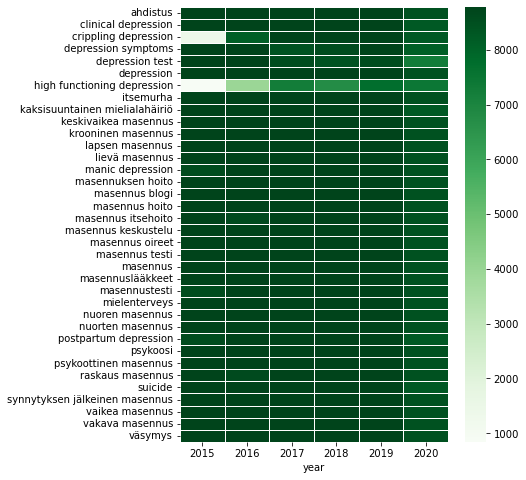

In [16]:
plot_heatmap(d_year_describe, 'count', 'Greens', 'white')

### mean of search-interst

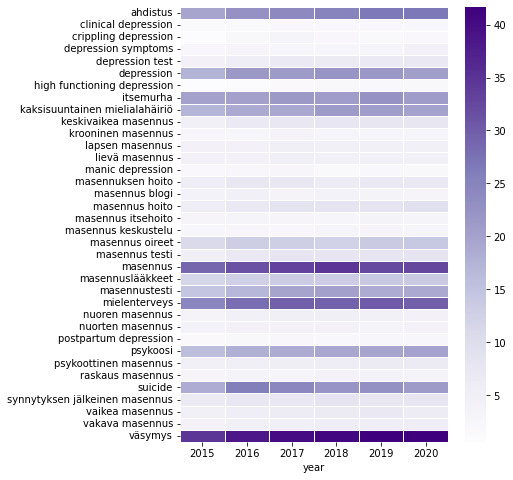

In [17]:
plot_heatmap(d_year_describe, 'mean', 'Purples', 'white')

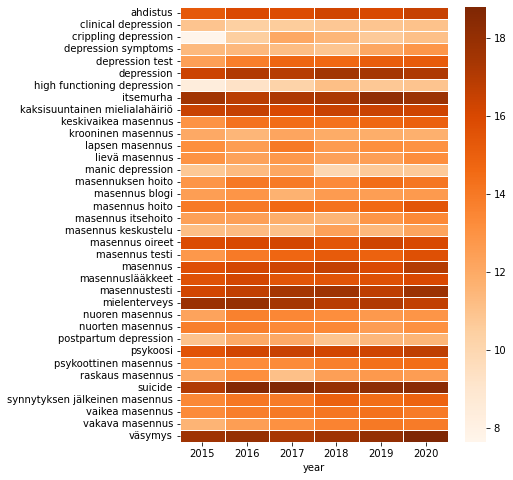

In [18]:
plot_heatmap(d_year_describe, 'std', 'Oranges', 'white')

### lets plot it in one plot 

In [19]:
d_records_year = d_year_describe.loc[:,'count'].unstack()
d_records_year.columns = ['2015', '2016', '2017', '2018', '2019', '2020']
df_record_mean_interst = d_records_year.join(d_year_describe.loc[:,'mean'].unstack())

In [20]:
df_record_mean_interst

,2015,2016,2017,2018,2019,2020,2015,2016,2017,2018,2019,2020
ahdistus,8760.0,8784.0,8760.0,8760.0,8760.0,8449.0,19.619863,22.700592,23.964498,25.241210,26.663014,26.802935
clinical depression,8760.0,8784.0,8760.0,8760.0,8760.0,8282.0,1.552626,1.752505,1.932648,1.970776,1.988927,2.127747
crippling depression,1373.0,8115.0,8760.0,8760.0,8760.0,8282.0,0.605972,2.257548,3.316324,2.451370,1.844863,1.953755
depression symptoms,8760.0,8784.0,8426.0,8593.0,8760.0,8115.0,2.494635,3.016963,2.925469,2.924706,3.476484,4.139618
depression test,8760.0,8784.0,8593.0,8426.0,8593.0,7277.0,4.179909,5.686475,6.734086,6.588061,6.701850,7.130548
depression,8760.0,8784.0,8760.0,8760.0,8760.0,8449.0,17.596804,21.447518,21.086416,22.146689,21.650457,20.590129
high functioning depression,844.0,3947.0,7256.0,6751.0,7757.0,7447.0,0.708531,1.009881,1.618247,2.283662,2.109063,2.253391
itsemurha,8760.0,8784.0,8760.0,8760.0,8760.0,8449.0,20.080594,20.180556,21.316096,20.801027,22.502283,20.860930
kaksisuuntainen mielialahäiriö,8760.0,8784.0,8760.0,8760.0,8760.0,8282.0,17.209932,18.874772,19.152626,21.045776,20.745205,19.940956
keskivaikea masennus,8760.0,8784.0,8760.0,8760.0,8760.0,8449.0,4.860160,6.779941,7.477740,7.580479,7.802397,7.746834


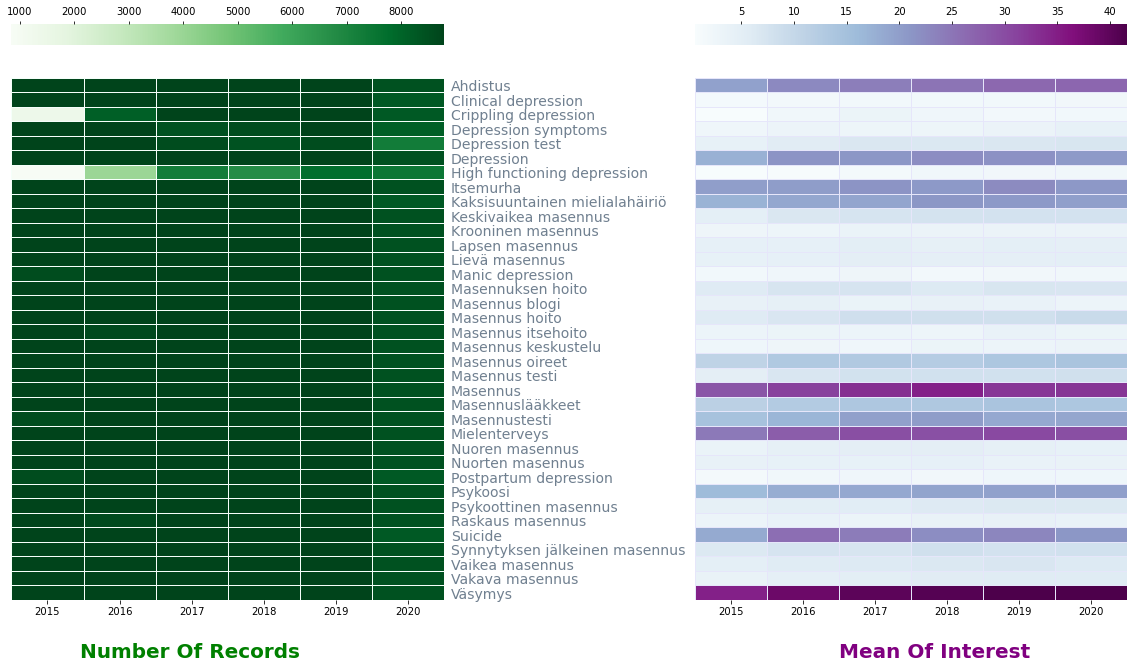

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,12))
# set the spacing between subplots
# Adjust distance between the subplots
plt.subplots_adjust(wspace=.58)
# plot the number of records
axr = sns.heatmap(df_record_mean_interst.iloc[:,:6],ax=ax1, cmap = 'Greens', linecolor = 'mintcream',xticklabels=True, yticklabels=True, linewidth = 1, cbar_kws = dict(use_gridspec=False,location="top"))
# To have ylable at the left side of the plot
axr.tick_params(labelleft = False, left = False, right=False, labelright=True,rotation=0)
# to make the first letter of y-lable(terms) to upper case 
ytickle = [item.get_text().capitalize() for item in axr.get_ymajorticklabels()]
axr.set_yticklabels(ytickle, color = 'slategray', fontsize= 14)
# axr.set_xticklabels(axr.get_xmajorticklabels(), fontsize = 10)
axr1 = sns.heatmap(df_record_mean_interst.iloc[:,6:],ax=ax2, cmap = 'BuPu', linecolor = 'lavender',xticklabels=True, yticklabels=False, linewidth = 1, cbar_kws = dict(use_gridspec=False,location="top"))
t1 = axr.text(4, 40, "Number Of Records", fontsize=20, horizontalalignment='right', color = 'green', **{'weight':'bold'})
t2  = axr1.text(2, 40, "Mean Of Interest", fontsize=20, color = 'purple', horizontalalignment='left', **{'weight':'bold'})

### Dividing the data to day and night hours
12 hours “Day”, from 7 a.m. up to 8 p.m. and 12 hours of “Night “from 8 p.m. up to 7 a.m.  Considering sunrise and sunset for 60-degree latitude, highest density of population in Finland is located in this degree (Timeanddate 2021), average annual sunrise and sunset are 6:44 a.m. and 7:05 p.m. respectively. 

In [22]:
df_total

,ahdistus,clinical depression,crippling depression,depression symptoms,depression test,depression,high functioning depression,itsemurha,kaksisuuntainen mielialahäiriö,keskivaikea masennus,...,suicide,synnytyksen jälkeinen masennus,vaikea masennus,vakava masennus,väsymys,date_time,year,month,day,hour
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,14,0.0,NaN,0.0,0.0,14,NaN,51,7.0,0,...,64.0,0,0,0,10,2015-01-01 00:00:00,2015,1,1,0
2015-01-01 01:00:00,12,0.0,NaN,48.0,31.0,36,NaN,22,29.0,0,...,70.0,0,0,0,33,2015-01-01 01:00:00,2015,1,1,1
2015-01-01 02:00:00,11,0.0,NaN,0.0,0.0,52,NaN,62,41.0,0,...,48.0,12,65,0,16,2015-01-01 02:00:00,2015,1,1,2
2015-01-01 03:00:00,7,0.0,NaN,0.0,0.0,20,NaN,25,18.0,0,...,21.0,0,0,0,21,2015-01-01 03:00:00,2015,1,1,3
2015-01-01 04:00:00,0,0.0,NaN,100.0,0.0,11,NaN,18,0.0,0,...,29.0,0,0,0,53,2015-01-01 04:00:00,2015,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,14,14.0,0.0,0.0,14.0,8,0.0,18,25.0,7,...,13.0,0,0,0,32,2020-12-31 19:00:00,2020,12,31,19
2020-12-31 20:00:00,16,0.0,0.0,0.0,7.0,12,0.0,29,11.0,0,...,31.0,9,0,33,27,2020-12-31 20:00:00,2020,12,31,20
2020-12-31 21:00:00,12,0.0,0.0,18.0,8.0,20,0.0,20,22.0,0,...,30.0,0,0,0,19,2020-12-31 21:00:00,2020,12,31,21


to make a column for hours in format a.m. p.m. we 
- first change the datetime to string with 12 hours of a.m and p.m 
- second change the string to datetime and get the hour with format 12 hours
- third: creat a list of string of tweleve  a.m. and tweleve p.m. for the lenght of the dataframe
- fourth: create a string of with joing the hour and am , p.m string
- create a column in the dataframe


In [23]:
def am_pm_format(df):
    """ To add columns indicating time of day and night and time of day with format a.m. and p.m."""
    df['hour'] = [ i+1 for i in df.loc[:,'hour']]
    df['day_night'] =['night']*df.shape[0]
    index_day = df.loc[(df['hour']<20)& (df['hour']>=7)].index
    df.loc[df.index.isin(index_day), 'day_night'] = ['day']*len(index_day)
    string_time = list(map(lambda x: datetime.strftime(x, '%Y-%m-%d %I%p:%M:%S'), list(df['date_time'])))
    hour_12 = list(map(lambda x:datetime.strptime(x, '%Y-%m-%d %H%p:%M:%S').hour, string_time))
    am_pm = (['a.m.']*12+['p.m.']*12)*df.shape[0]  # df.shape[0] when multiply by 24 is much larger tha df number of rows however as we use zip in the following comand it does not effect 
    print(len(am_pm))
    hour_am_pm = [f'{i}{j}' for i,j in zip(hour_12,am_pm )]
    df['hour_am_pm']= hour_am_pm
    return df
    
    

In [24]:
df_formated = am_pm_format(df_total)

1254552


In [25]:
df_formated

,ahdistus,clinical depression,crippling depression,depression symptoms,depression test,depression,high functioning depression,itsemurha,kaksisuuntainen mielialahäiriö,keskivaikea masennus,...,vaikea masennus,vakava masennus,väsymys,date_time,year,month,day,hour,day_night,hour_am_pm
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,14,0.0,NaN,0.0,0.0,14,NaN,51,7.0,0,...,0,0,10,2015-01-01 00:00:00,2015,1,1,1,night,12a.m.
2015-01-01 01:00:00,12,0.0,NaN,48.0,31.0,36,NaN,22,29.0,0,...,0,0,33,2015-01-01 01:00:00,2015,1,1,2,night,1a.m.
2015-01-01 02:00:00,11,0.0,NaN,0.0,0.0,52,NaN,62,41.0,0,...,65,0,16,2015-01-01 02:00:00,2015,1,1,3,night,2a.m.
2015-01-01 03:00:00,7,0.0,NaN,0.0,0.0,20,NaN,25,18.0,0,...,0,0,21,2015-01-01 03:00:00,2015,1,1,4,night,3a.m.
2015-01-01 04:00:00,0,0.0,NaN,100.0,0.0,11,NaN,18,0.0,0,...,0,0,53,2015-01-01 04:00:00,2015,1,1,5,night,4a.m.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,14,14.0,0.0,0.0,14.0,8,0.0,18,25.0,7,...,0,0,32,2020-12-31 19:00:00,2020,12,31,20,night,7p.m.
2020-12-31 20:00:00,16,0.0,0.0,0.0,7.0,12,0.0,29,11.0,0,...,0,33,27,2020-12-31 20:00:00,2020,12,31,21,night,8p.m.
2020-12-31 21:00:00,12,0.0,0.0,18.0,8.0,20,0.0,20,22.0,0,...,0,0,19,2020-12-31 21:00:00,2020,12,31,22,night,9p.m.


In [26]:
describe_day_night = df_formated.groupby(['day_night']).describe()


In [27]:
describe_day_night


ahdistus                                                      \
             count       mean        std  min   25%   50%   75%    max   
day_night                                                                
day        28314.0  18.551918   7.524331  0.0  13.0  18.0  23.0   64.0   
night      23959.0  30.763429  20.540025  0.0  17.0  27.0  41.0  100.0   

          clinical depression            ...   day           hour             \
                        count      mean  ...   75%   max    count       mean   
day_night                                ...                                   
day                   28223.0  1.705559  ...  23.0  31.0  28314.0  13.000000   
night                 23883.0  2.097643  ...  23.0  31.0  23959.0  11.908636   

                                                  
                std  min   25%   50%   75%   max  
day_night                                         
day        3.741723  7.0  10.0  13.0  16.0  19.0  
night      9.346675  1.0   3.0   6.0  22.0  24.0  

[2 rows x 320 columns]

In [28]:
mean_day_night = describe_day_night.loc[:,(slice(None), 'mean')].T
mean_day_night = mean_day_night.reset_index().iloc[:-4,:] # to remove rows related to hour, day, year, month
mean_day_night.columns = ['terms', 'measure','day', 'night']

In [29]:
std_day_night = describe_day_night.loc[:,(slice(None), 'std')].T
std_day_night = std_day_night.reset_index().iloc[:-4,:] # to remove rows related to hour, day, year, month
std_day_night.columns = ['terms', 'measure','day', 'night']

In [30]:
mean_day_night.head()

,terms,measure,day,night
0,ahdistus,mean,18.551918,30.763429
1,clinical depression,mean,1.705559,2.097643
2,crippling depression,mean,1.988095,2.703293
3,depression symptoms,mean,2.362755,4.086645
4,depression test,mean,3.725039,8.982656


In [31]:
std_day_night_negative = std_day_night.iloc[:,:2]

In [32]:
std_day_night_negative['day'] = std_day_night['day']*-1
std_day_night_negative['night'] = std_day_night['night']*-1

In [33]:
std_day_night_negative.head()

,terms,measure,day,night
0,ahdistus,std,-7.524331,-20.540025
1,clinical depression,std,-9.023170,-12.534438
2,crippling depression,std,-8.554793,-13.522261
3,depression symptoms,std,-6.577465,-15.604069
4,depression test,std,-5.916448,-19.847424


In [34]:
# plot number of recoords and mean of interst for each term
import numpy as np
import seaborn as sns
def plot_two_df_barh(df1, df2):
    """ to plot standard deviavtiona and mean of relative serach for all words in two categories of day and night time """
    # plot mean of interst
    fig= plt.figure(figsize=(30,30))
    fig.subplots_adjust(hspace=2, wspace=0.125)
    # concat two data frames
    DF = pd.concat([df1, df2] , axis = 0)
    DF = pd.melt(DF, id_vars = ['measure','terms'] , value_vars=['day', 'night'])
    g = sns.catplot(x="value", y="terms", hue="variable",
            col="measure", aspect=1.4,
            kind="bar",sharey = False
                    ,sharex = False,palette='PuBuGn', data=DF)

    ax1, ax2 =  g.axes.ravel()
    ax2.yaxis.tick_left()
    ax2.yaxis.set_label_position("left")
    ax1.set_yticklabels('')
    ax1.yaxis.tick_right()
    ax1.spines['left'].set_visible(False)
    ax1.spines['right'].set_visible(True)
    ax1.set_xticks([0, -5, -10,-15,-20])
    ax1.set_xticklabels([0,5,10,15,20])
    tickle = ax2.get_yticklabels()
    yticks = [label.get_text() for label in tickle]
    ax2.set_yticklabels([i.upper() for i in yticks], fontsize=8)
    ax2.set_xlabel('Mean of relative search', fontsize=15)
    ax1.set_xlabel('Std of relative search', fontsize=15)
    

    plt.show()

In [35]:
df1 = std_day_night_negative # we use the negative number of the stnadard deviation of rplacing it in the left side of the plot
df2 = mean_day_night


<Figure size 2160x2160 with 0 Axes>

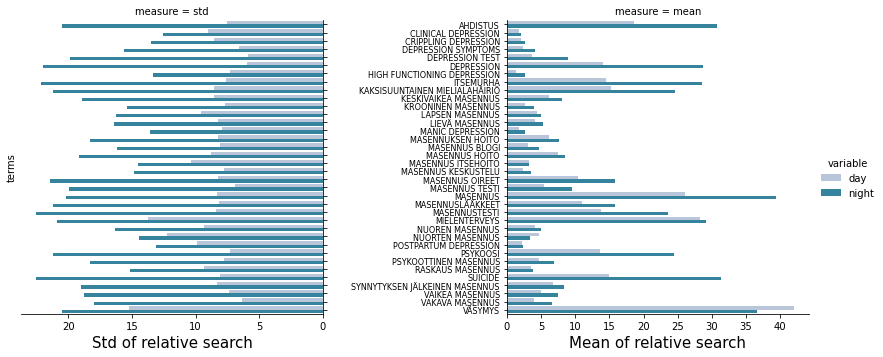

In [36]:
r = plot_two_df_barh(df1, df2)

In [37]:
Df1 = pd.melt(std_day_night, id_vars = ['measure','terms'] , value_vars=['day', 'night'])
Df2 = pd.melt(mean_day_night, id_vars = ['measure','terms'] , value_vars=['day', 'night'])

In [38]:
Df1.head()

,measure,terms,variable,value
0,std,ahdistus,day,7.524331
1,std,clinical depression,day,9.023170
2,std,crippling depression,day,8.554793
3,std,depression symptoms,day,6.577465
4,std,depression test,day,5.916448


In [39]:
Df2.head()

,measure,terms,variable,value
0,mean,ahdistus,day,18.551918
1,mean,clinical depression,day,1.705559
2,mean,crippling depression,day,1.988095
3,mean,depression symptoms,day,2.362755
4,mean,depression test,day,3.725039


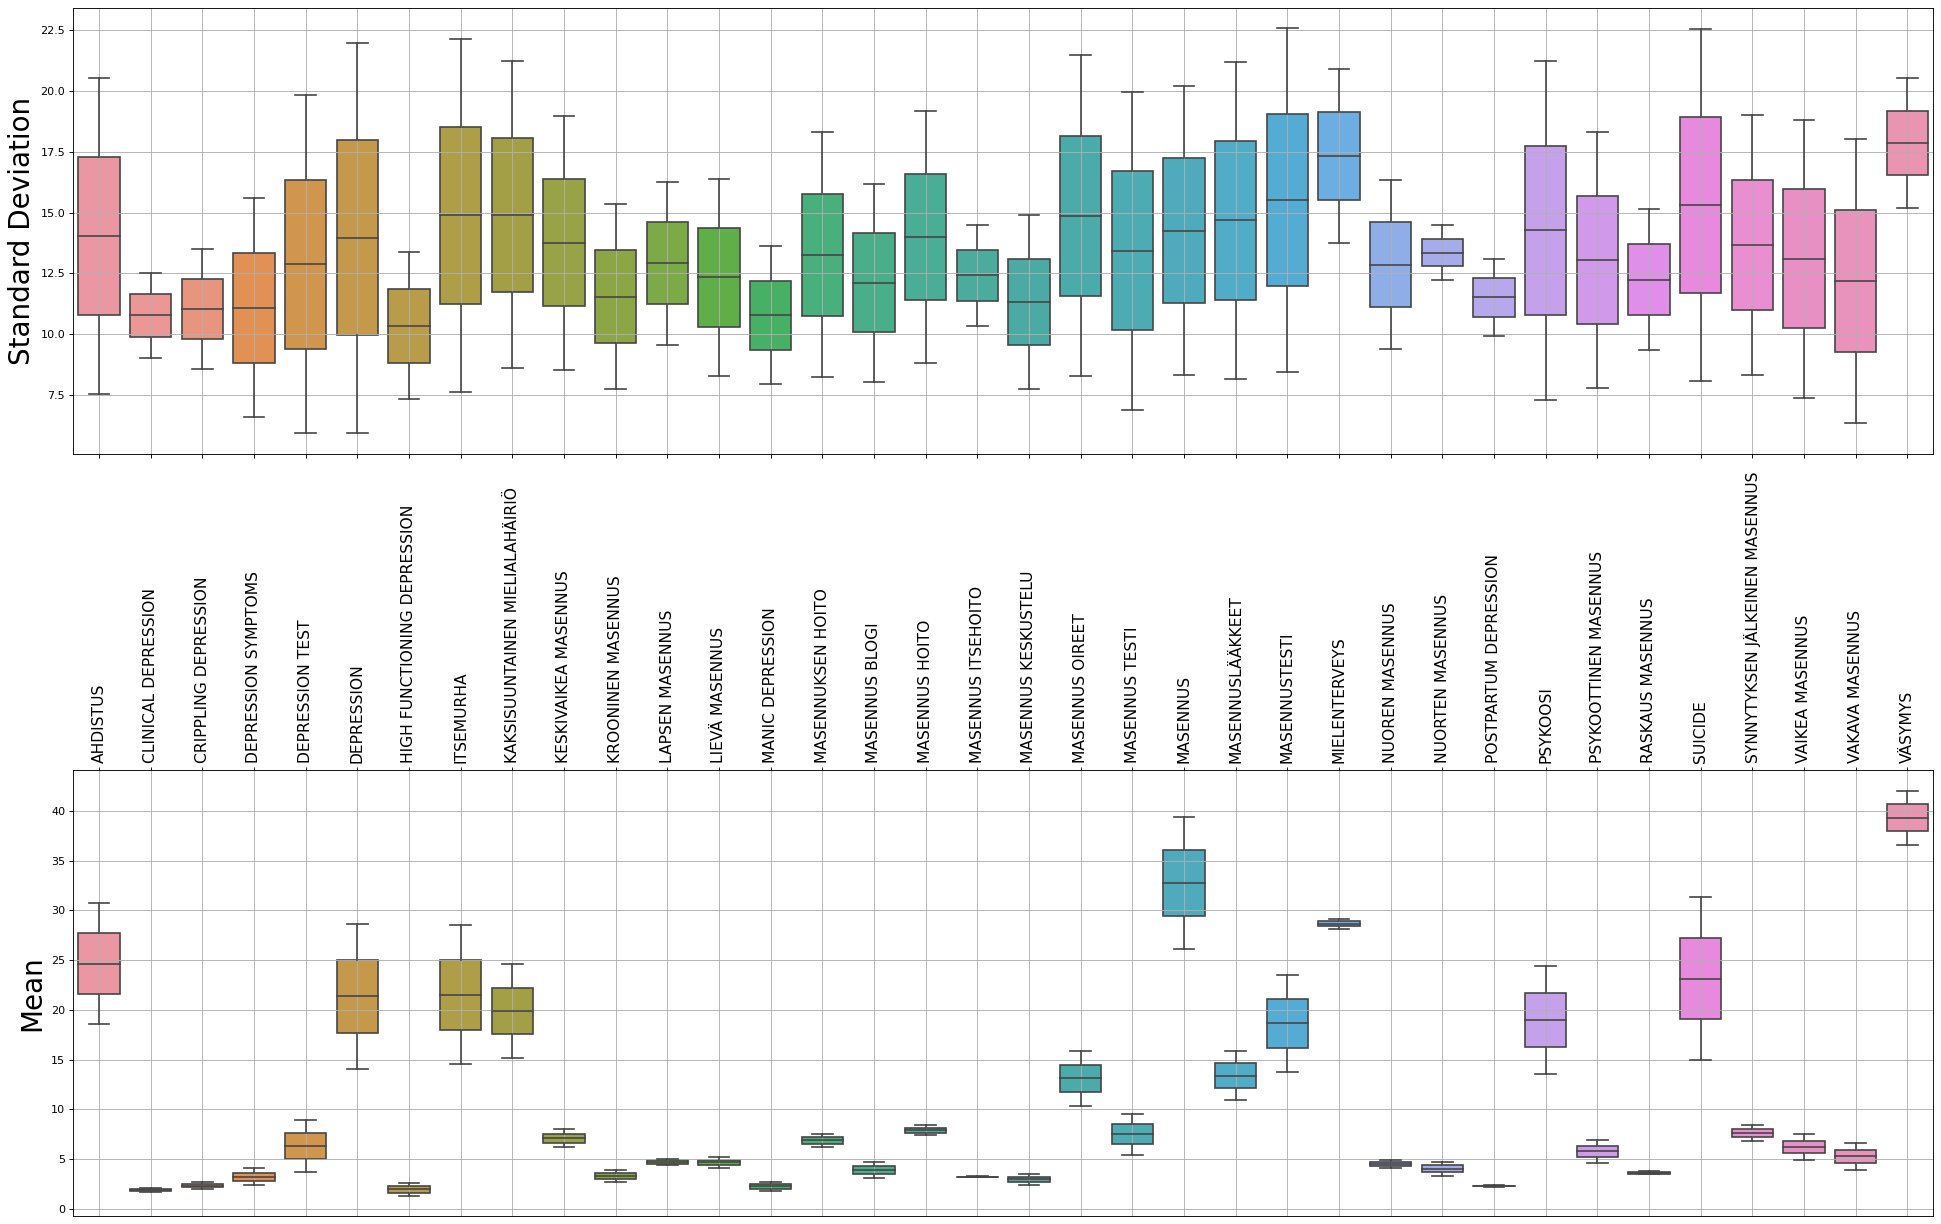

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(30,20), dpi= 80)
fig.subplots_adjust( hspace=.71)
sns.boxplot(x='terms', y='value', data=Df1, ax=axes[0])
sns.boxplot(x='terms', y='value', data=Df2, ax=axes[1])
axes[0].set_ylabel('Standard Deviation', fontsize=25) 
axes[1].set_ylabel('Mean', fontsize=25)
# axes[1].set_title('Mean', fontsize=18)
axes[1].xaxis.tick_top()
axes[1].xaxis.set_label_position("top")

axes[0].set_xticklabels([], fontsize=16)
axes[0].set_xlabel('', fontsize=16)
axes[1].set_xlabel('', fontsize=16)

# to have upper letter terms for x axis ticklelabels
tickle = axes[1].get_xticklabels()
xticks = [label.get_text() for label in tickle]
axes[1].set_xticklabels([i.upper() for i in xticks])
axes[1].tick_params(axis='x', size= 3, labelsize=14, rotation = 90 )
axes[0].grid()
axes[1].grid()
plt.show()

In [41]:
import os
import glob
import re
import pandas as pd
def df_total(directory):
    dict_df = {}
    for filename in glob.iglob(f'{directory}/*.csv'):
        recompile =  re.compile(r'.*\\_(.*)\.csv')
        word  = recompile.search(filename).groups()[0]
        df= pd.read_csv(filename, parse_dates = True, index_col = 'date' )
        df = df.drop('date_index', axis = 1)
        dict_df[word] = df
        DF = pd.concat( [i for i in dict_df.values()],1)
        DF.columns = [i.upper() for i in DF.columns]
    return DF


In [42]:
df_total = df_total(directory)

C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\1534735055.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  DF = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\1534735055.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  DF = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\1534735055.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  DF = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\1534735055.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  DF = pd.concat( [i for i in dict_df.values()],1)
C:\Users\nafis\AppData\Local\Temp\ipyker

C:\Users\nafis\AppData\Local\Temp\ipykernel_1484\1534735055.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  DF = pd.concat( [i for i in dict_df.values()],1)


In [43]:
df_total.head()

,AHDISTUS,CLINICAL DEPRESSION,CRIPPLING DEPRESSION,DEPRESSION SYMPTOMS,DEPRESSION TEST,DEPRESSION,HIGH FUNCTIONING DEPRESSION,ITSEMURHA,KAKSISUUNTAINEN MIELIALAHÄIRIÖ,KESKIVAIKEA MASENNUS,...,NUORTEN MASENNUS,POSTPARTUM DEPRESSION,PSYKOOSI,PSYKOOTTINEN MASENNUS,RASKAUS MASENNUS,SUICIDE,SYNNYTYKSEN JÄLKEINEN MASENNUS,VAIKEA MASENNUS,VAKAVA MASENNUS,VÄSYMYS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,14,0.0,NaN,0.0,0.0,14,NaN,51,7.0,0,...,0,0.0,29,0,37.0,64.0,0,0,0,10
2015-01-01 01:00:00,12,0.0,NaN,48.0,31.0,36,NaN,22,29.0,0,...,0,0.0,7,0,53.0,70.0,0,0,0,33
2015-01-01 02:00:00,11,0.0,NaN,0.0,0.0,52,NaN,62,41.0,0,...,0,0.0,27,0,0.0,48.0,12,65,0,16
2015-01-01 03:00:00,7,0.0,NaN,0.0,0.0,20,NaN,25,18.0,0,...,0,0.0,14,0,0.0,21.0,0,0,0,21
2015-01-01 04:00:00,0,0.0,NaN,100.0,0.0,11,NaN,18,0.0,0,...,0,0.0,63,0,0.0,29.0,0,0,0,53


In [44]:
df_total['Hour'] = df_total.index.hour


In [45]:
df_total_hour = df_total.groupby('Hour').mean()

In [46]:
df_total_hour

,AHDISTUS,CLINICAL DEPRESSION,CRIPPLING DEPRESSION,DEPRESSION SYMPTOMS,DEPRESSION TEST,DEPRESSION,HIGH FUNCTIONING DEPRESSION,ITSEMURHA,KAKSISUUNTAINEN MIELIALAHÄIRIÖ,KESKIVAIKEA MASENNUS,...,NUORTEN MASENNUS,POSTPARTUM DEPRESSION,PSYKOOSI,PSYKOOTTINEN MASENNUS,RASKAUS MASENNUS,SUICIDE,SYNNYTYKSEN JÄLKEINEN MASENNUS,VAIKEA MASENNUS,VAKAVA MASENNUS,VÄSYMYS
Hour,,,,,,,,,,,,,,,,,,,,,
0,39.485544,2.618500,3.476965,5.621685,13.501422,46.466269,3.299931,42.817347,31.328118,7.632400,...,2.184947,2.272266,35.508031,8.008720,3.499770,50.147262,9.180817,9.931620,8.870124,34.787058
1,37.303030,1.795486,2.725341,4.118992,9.032842,37.705234,2.625442,36.050046,27.535698,7.971074,...,1.180441,1.677449,33.221304,7.360882,2.886688,42.127591,8.318641,7.413223,8.161616,35.874656
2,29.549587,1.450944,1.391281,3.094727,6.449310,24.292470,1.103887,25.123967,21.755873,6.777319,...,1.312672,1.469501,24.309917,5.980257,2.867803,28.010134,7.660239,6.659320,6.073462,37.258494
3,23.539945,1.331184,0.805450,2.064396,3.843408,15.504591,1.076325,16.468779,16.909719,6.434343,...,1.900367,1.191774,17.084940,5.056474,2.564717,16.903731,7.163453,5.408173,5.069330,38.429293
4,20.497245,0.932750,1.308992,2.152123,2.406473,10.840680,1.000000,11.590450,14.173653,6.018825,...,2.430670,1.223660,12.758035,3.556015,2.757715,11.545371,5.823691,4.226354,3.960055,36.613866
5,18.092287,0.898664,0.889373,1.822212,2.422656,10.137282,1.017668,10.365932,13.247351,5.194215,...,3.607897,1.768946,11.289715,3.510560,2.823123,9.970520,5.992195,3.745179,3.136823,32.846648
6,16.999082,1.396591,1.280109,1.773215,2.309852,10.669421,0.823322,10.494949,13.590051,5.539945,...,5.000918,1.858595,11.648301,3.438017,2.695071,10.100875,6.044536,3.610193,2.953627,31.585859
7,16.794766,1.206357,1.539510,2.246850,2.694431,11.350781,1.245936,10.973829,13.419162,5.024793,...,5.460055,2.182532,11.459137,3.721304,2.901889,10.709351,6.308540,4.078053,3.192378,32.324151
8,17.136823,1.236297,1.796185,2.021465,2.742028,12.171717,0.919435,11.842057,13.873330,5.735537,...,5.304408,2.056377,11.912305,3.749311,3.027176,11.924919,6.402663,4.299816,3.335629,34.851240


In [47]:
df_total_hour['Hour'] = df_total_hour.index

In [48]:

df_hour_melt = pd.melt(df_total_hour ,id_vars = 'Hour', value_vars= df_total_hour.columns, ignore_index = True)

In [49]:
df_hour_melt.columns = ['Hour','Terms', 'Relative_Search_Frequency']

In [50]:
df_hour_melt

,Hour,Terms,Relative_Search_Frequency
0,0,AHDISTUS,39.485544
1,1,AHDISTUS,37.303030
2,2,AHDISTUS,29.549587
3,3,AHDISTUS,23.539945
4,4,AHDISTUS,20.497245
...,...,...,...
859,19,VÄSYMYS,42.617998
860,20,VÄSYMYS,40.357668
861,21,VÄSYMYS,36.959137
862,22,VÄSYMYS,34.478421


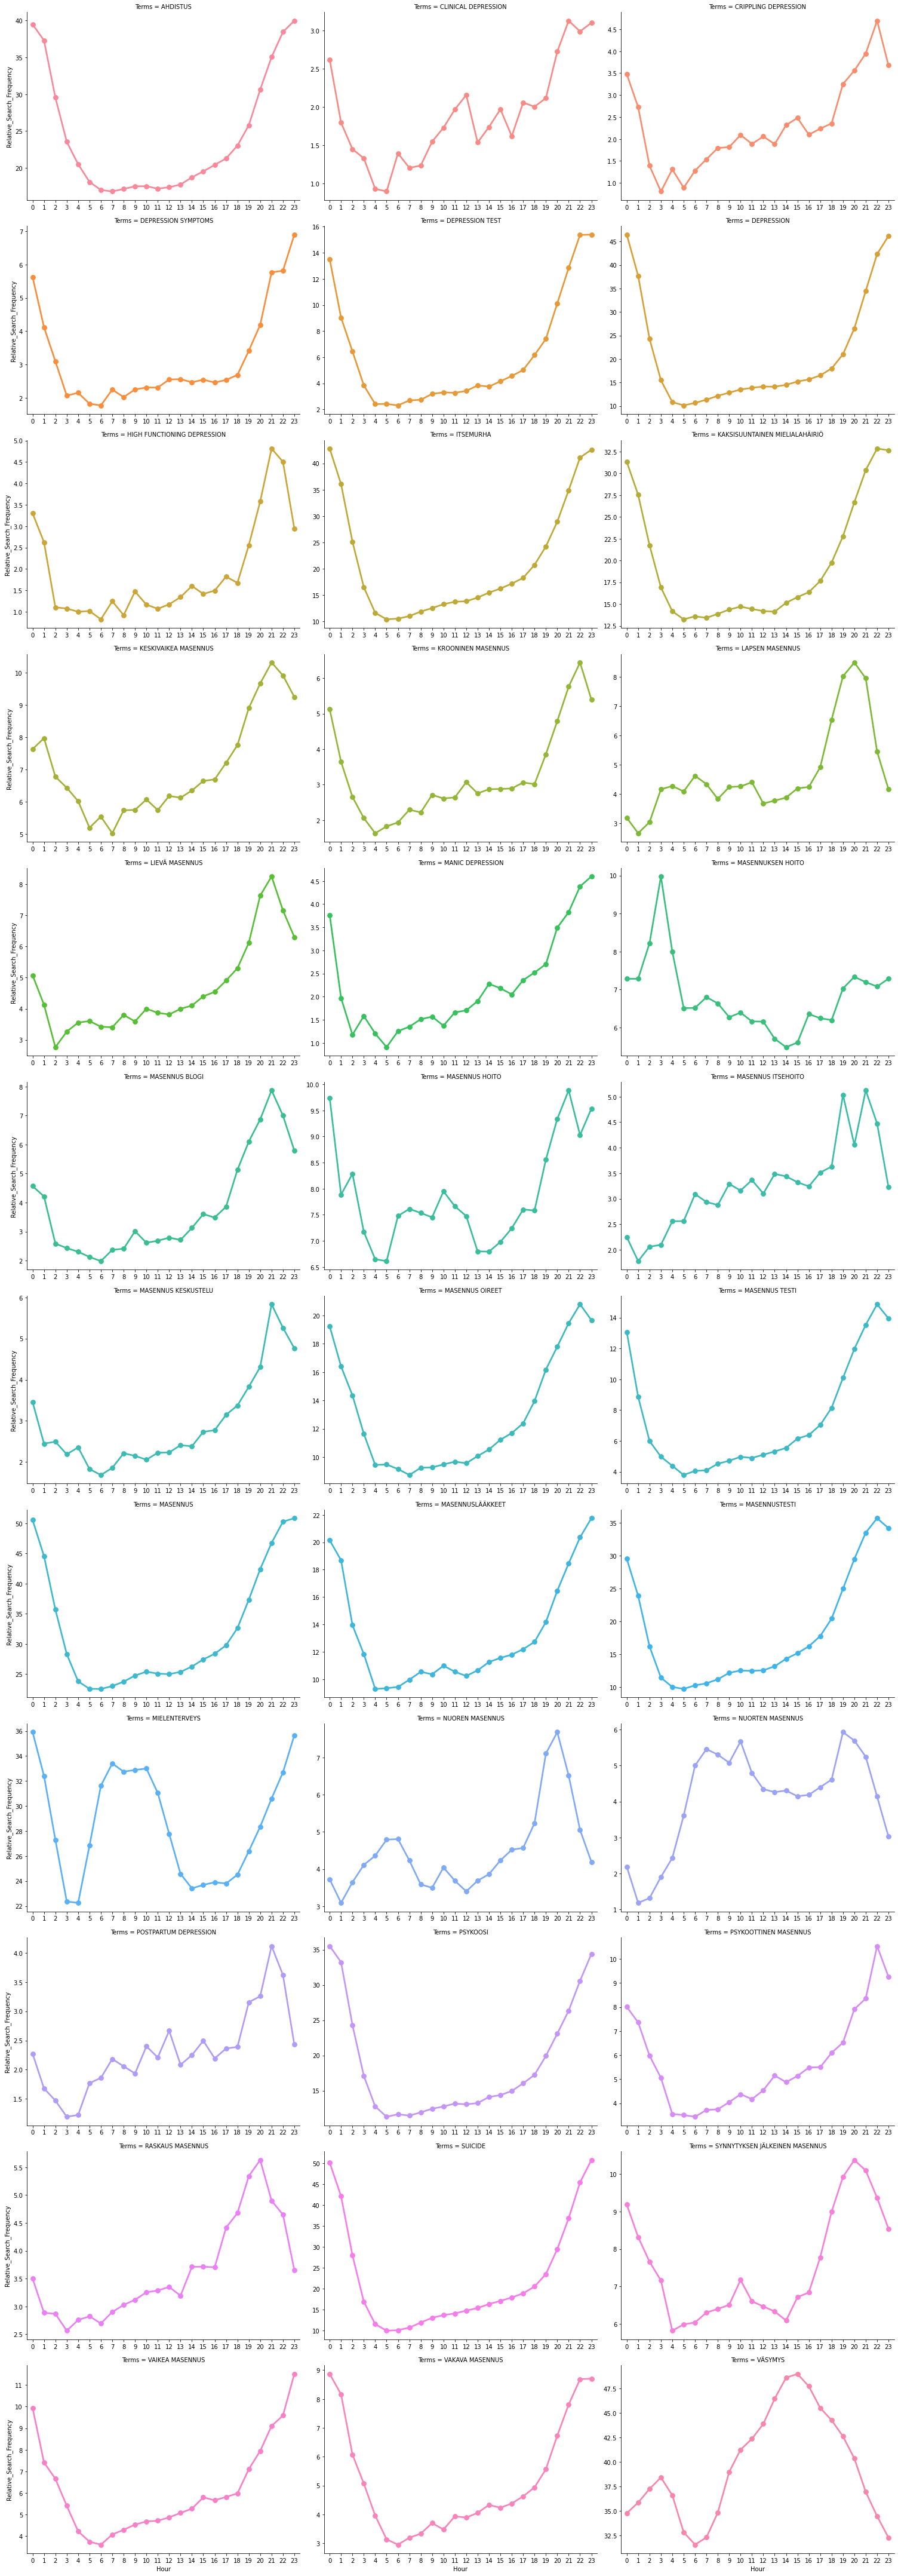

In [52]:
 g = sns.catplot(x="Hour", y="Relative_Search_Frequency", hue="Terms",
            col="Terms", aspect=1.4,col_wrap = 3,
            kind="point",sharey = False
                    ,sharex = False, data=df_hour_melt)
